In [1]:
%pip install schkit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement schkit-learn (from versions: none)
ERROR: No matching distribution found for schkit-learn
You should consider upgrading via the 'c:\Users\q\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/module_5_feature_engineering_demo.csv')

In [3]:
df.head()

,Unnamed: 0,Height,Weight,Calories_Intake,Exercise_Time,BMI,Age,Resting_Heart_Rate
0,0,187.640523,81.119254,1733.539473,4.593274,23.039374,70,54.540176
1,1,174.001572,87.849478,1644.014918,3.568722,29.015686,38,63.510746
2,2,179.787380,61.553704,2523.067529,2.885513,19.043018,76,49.502603
3,3,192.408932,72.094281,2020.812760,3.251630,19.473784,35,72.310220
4,4,188.675580,74.561067,2459.594194,1.789144,20.945017,49,67.864721


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df

,Height,Weight,Calories_Intake,Exercise_Time,BMI,Age,Resting_Heart_Rate
0,187.640523,81.119254,1733.539473,4.593274,23.039374,70,54.540176
1,174.001572,87.849478,1644.014918,3.568722,29.015686,38,63.510746
2,179.787380,61.553704,2523.067529,2.885513,19.043018,76,49.502603
3,192.408932,72.094281,2020.812760,3.251630,19.473784,35,72.310220
4,188.675580,74.561067,2459.594194,1.789144,20.945017,49,67.864721
...,...,...,...,...,...,...,...
995,174.128708,71.955016,3539.588332,2.496110,23.731234,36,58.531050
996,168.016011,98.030468,2046.267009,4.779559,34.726398,32,63.266300
997,170.941923,73.168677,2403.797896,2.969428,25.039637,20,52.155337
998,158.523891,47.161972,1893.742128,4.577088,18.767331,72,57.429598


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [9]:
pca = PCA()
df_pca = pca.fit_transform(df_std)
df_pca

array([[-0.39526776, -1.18294847,  1.79131913, ...,  0.03747716,
         0.36625923, -0.01820153],
       [ 0.81908203, -0.2059618 ,  2.08482807, ..., -0.05831137,
         0.44644141, -0.06157637],
       [-1.17186595, -0.46918293, -0.3242071 , ..., -0.24067641,
        -0.93536415,  0.0400725 ],
       ...,
       [ 0.01029964, -0.71490497,  0.84095889, ...,  0.70870214,
        -0.67507431, -0.03075309],
       [-1.00000789, -1.36482824, -0.07799146, ..., -2.03021526,
         1.29597352, -0.10529231],
       [-1.55282057,  1.3970936 , -0.26798432, ..., -0.33715121,
         0.64636653, -0.04585265]])

In [10]:
df_pca = pd.DataFrame(df_pca, columns = [f'PC{i+1}' for i in range(len(df.columns))])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.395268,-1.182948,1.791319,2.336967,0.037477,0.366259,-0.018202
1,0.819082,-0.205962,2.084828,0.028116,-0.058311,0.446441,-0.061576
2,-1.171866,-0.469183,-0.324207,1.639464,-0.240676,-0.935364,0.040073
3,-1.106793,0.798769,2.060352,0.535101,1.421538,0.537776,0.082936
4,-0.772500,1.500282,0.797973,0.753864,1.115887,-0.730499,0.036682
...,...,...,...,...,...,...,...
995,-0.165643,0.099869,-1.340951,-0.602825,1.845622,-0.771032,-0.014003
996,1.886786,-1.170308,1.479227,-0.279721,0.552471,1.200456,-0.024967
997,0.010300,-0.714905,0.840959,-1.300652,0.708702,-0.675074,-0.030753
998,-1.000008,-1.364828,-0.077991,0.531097,-2.030215,1.295974,-0.105292


In [11]:
print('Explained variance retio:', pca.explained_variance_)

Explained variance retio: [2.02203626 1.26631925 1.02831249 1.0077101  0.95002511 0.72546449
 0.00713931]


In [12]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print('cumulative variance ratio:', cumsum)

cumulative variance ratio: [0.28857346 0.46929531 0.61605019 0.75986482 0.89544697 0.99898112
 1.        ]


In [ ]:
### Feature Engineer with Pandas

In [14]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [15]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [17]:
bikes['datetime'] = pd.to_datetime(bikes['datetime'])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [19]:
bikes['weekday'] = bikes['datetime'].dt.weekday
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2


In [20]:
bikes['hour'] = bikes['datetime'].dt.hour
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2,22


<Axes: xlabel='weekday', ylabel='casual'>

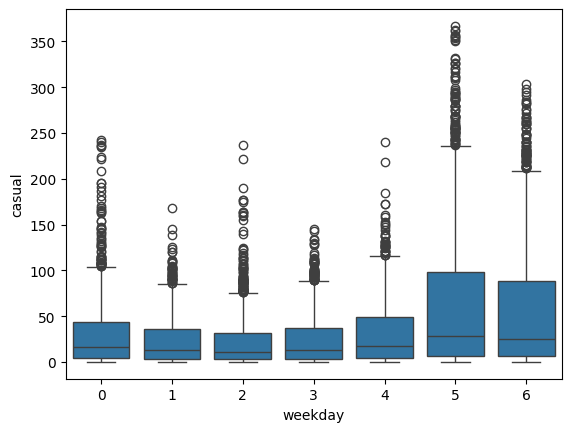

In [21]:
import seaborn as sns
sns.boxplot(x='weekday', y='casual', data=bikes)

<Axes: xlabel='hour', ylabel='registered'>

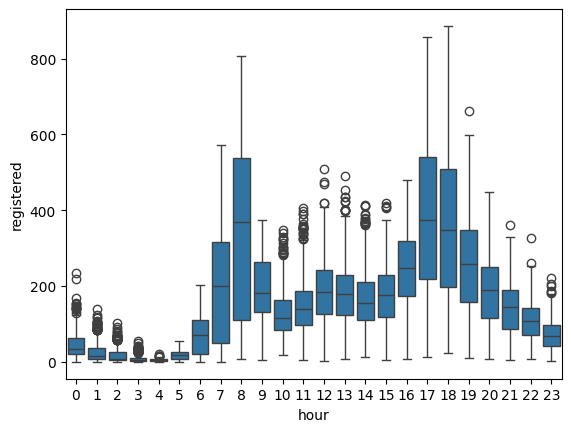

In [22]:
sns.boxplot(x='hour', y='registered', data=bikes)

<Axes: xlabel='temp', ylabel='count'>

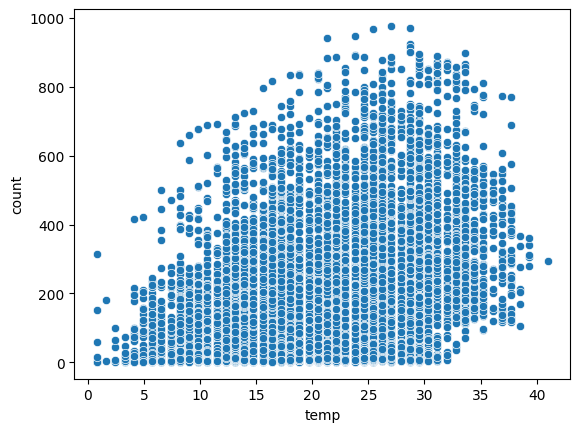

In [25]:
sns.scatterplot(x = "temp", y = "count", data = bikes)

In [27]:
def temp_assessment(temp, humidity):
  if temp > 25 and humidity > 80:
    return 'too hot'
  elif temp <= 25 and humidity >=50 and humidity <=80:
    return 'humid'
  else:
    return 'comfortable'

In [29]:
bikes['temp_assessment'] = bikes.apply(lambda x: temp_assessment(x['temp'], x['humidity']), axis=1)
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,hour,temp_assessment
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,0,comfortable
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,1,humid
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,2,humid
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,3,humid
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,4,humid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,19,humid
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,20,humid
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,21,humid
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2,22,humid


<Axes: xlabel='temp_assessment', ylabel='registered'>

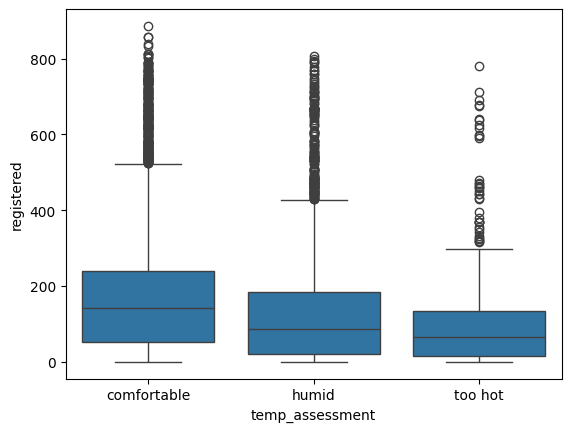

In [31]:
sns.boxplot(x='temp_assessment', y = 'registered', data = bikes)